# Anime Database

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy import stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
anime = pd.read_csv('/Users/rubenlarrazolo/Downloads/anime.csv')
print(anime)

      anime_id                                              title  \
0        11013                                      Inu x Boku SS   
1         2104                                   Seto no Hanayome   
2         5262                                 Shugo Chara!! Doki   
3          721                                      Princess Tutu   
4        12365                                Bakuman. 3rd Season   
...        ...                                                ...   
6663     37405                            Dokidoki Little Ooyasan   
6664     37886                        Wo Shi Jiang Xiaobai (2018)   
6665     37255              Genki Genki Non-tan: Obake Mura Meiro   
6666     35229                                Mr. Men Little Miss   
6667     36315  Mushi Mushi Mura no Nakama-tachi: Minna Ii Tok...   

                  title_english                      title_japanese  \
0     Inu X Boku Secret Service                              妖狐×僕SS   
1         My Bride is a Merma

In [9]:
pd.options.display.max_columns = None
anime.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,False,"Jan 13, 2012 to Mar 30, 2012","{'from': '2012-01-13', 'to': '2012-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,False,"Apr 2, 2007 to Oct 1, 2007","{'from': '2007-04-02', 'to': '2007-10-01'}",24 min. per ep.,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0,2007
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,False,"Oct 4, 2008 to Sep 25, 2009","{'from': '2008-10-04', 'to': '2009-09-25'}",24 min. per ep.,PG - Children,7.55,37129,1508.0,1173,70127,802,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0,2008
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,False,"Aug 16, 2002 to May 23, 2003","{'from': '2002-08-16', 'to': '2003-05-23'}",16 min. per ep.,PG-13 - Teens 13 or older,8.21,36501,307.0,916,93312,3344,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0,2002
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,False,"Oct 6, 2012 to Mar 30, 2013","{'from': '2012-10-06', 'to': '2013-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",24.0,2012


# Part 1: Is a rating score of 6.2 different from the mean for anime? 

Yes,the average anime rating is higher than 6.2.

<AxesSubplot:>

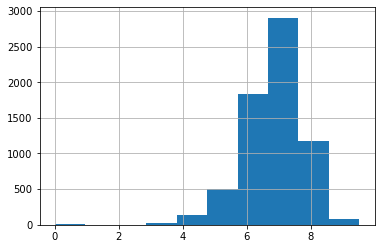

In [6]:
anime['score'].hist()

In [7]:
stats.ttest_1samp(anime['score'], 6.2)

Ttest_1sampResult(statistic=57.14153988539698, pvalue=0.0)

In [8]:
anime.score.mean()

6.848998200359939

# Does Anime that is Still Airing Differ in Popularity from Anime that is No Longer Airing?

Yes, those that are currently airing are more popular than those anime that are no longer airing.

<AxesSubplot:>

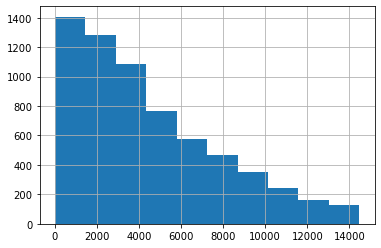

In [10]:
anime.popularity[anime.status == "Finished Airing"].hist()

<AxesSubplot:>

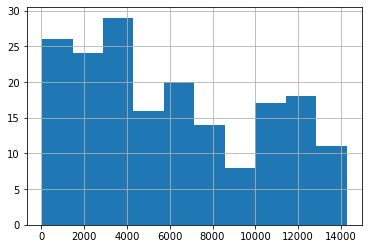

In [11]:
anime.popularity[anime.status == "Currently Airing"].hist()

In [12]:
ttest_ind(anime.popularity[anime.status == 'Finished Airing'], anime.popularity[anime.status == 'Currently Airing'])

Ttest_indResult(statistic=-6.489071311277514, pvalue=9.256789141747445e-11)

In [13]:
anime.popularity[anime.status == "Finished Airing"].mean()

4433.558057054742

In [14]:
anime.popularity[anime.status == "Currently Airing"].mean()

6108.131147540984

# Part 3 - Determine whether the source of the anime influences the type 

In [15]:
def source (series):
    if series == "4-koma manga" :
        return "Manga"
    if series == "Digital manga": 
        return "Manga"
    if series == "Manga": 
        return "Manga"
    if series == "Web Manga": 
        return "Manga"
    if series == "Book": 
        return "Book"
    if series == "Light novel": 
        return "Book"
    if series == "Novel": 
        return "Book"
    if series == "Picture book": 
        return "Book"
    if series == "Visual novel": 
        return "Book"
    if series == "Card game": 
        return "Game"
    if series == "Game": 
        return "Game"
    if series == "Music": 
        return "Listening"
    if series == "Radio": 
        return "Listening"
    if series == "Other": 
        return "Other"
    if series == "Original": 
        return "Other"
    
anime['sourceR'] = anime['source'].apply(source)

In [16]:
anime.head(2)

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year,sourceR
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,False,"Jan 13, 2012 to Mar 30, 2012","{'from': '2012-01-13', 'to': '2012-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012,Manga
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,False,"Apr 2, 2007 to Oct 1, 2007","{'from': '2007-04-02', 'to': '2007-10-01'}",24 min. per ep.,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0,2007,Manga


In [17]:
anime_crosstab = pd.crosstab(anime['sourceR'], anime['type'])

In [18]:
anime_crosstab

type,Movie,Music,ONA,OVA,Special,TV
sourceR,,,,,,
Book,163,2,62,389,174,584
Game,83,9,39,57,72,210
Listening,2,42,0,1,1,14
Manga,333,12,93,609,376,1271
Other,325,33,185,283,289,844


In [19]:
stats.chi2_contingency(anime_crosstab)

(2164.1608183289673,
 0.0,
 20,
 array([[1.89849626e+02, 2.05356108e+01, 7.94183316e+01, 2.80583499e+02,
         1.91106909e+02, 6.12506024e+02],
        [6.49412841e+01, 7.02455391e+00, 2.71663871e+01, 9.59783438e+01,
         6.53713589e+01, 2.09518072e+02],
        [8.29037670e+00, 8.96751563e-01, 3.46804941e+00, 1.22525545e+01,
         8.34527985e+00, 2.67469880e+01],
        [3.72237914e+02, 4.02641452e+01, 1.55715419e+02, 5.50139698e+02,
         3.74703065e+02, 1.20093976e+03],
        [2.70680799e+02, 2.92789385e+01, 1.13231813e+02, 4.00045905e+02,
         2.72473387e+02, 8.73289157e+02]]))

In [20]:
anime2 = anime[['score', 'scored_by', 'rank', 'popularity', 'members', 'favorites']]

In [21]:
anime2.head(2)

,score,scored_by,rank,popularity,members,favorites
0,7.63,139250,1274.0,231,283882,2809
1,7.89,91206,727.0,366,204003,2579


In [22]:
anime2.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,score,scored_by,rank,popularity,members,favorites
score,1.0,0.38,-0.9,-0.69,0.42,0.26
scored_by,0.38,1.0,-0.36,-0.43,0.99,0.79
rank,-0.9,-0.36,1.0,0.78,-0.39,-0.21
popularity,-0.69,-0.43,0.78,1.0,-0.47,-0.21
members,0.42,0.99,-0.39,-0.47,1.0,0.78
favorites,0.26,0.79,-0.21,-0.21,0.78,1.0
